In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
from tensorflow.keras import models, layers, optimizers
from sklearn.model_selection import train_test_split
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
x_train = x_train.reshape(-1, 28, 28, 1).astype('float32') / 255
x_test = x_test.reshape(-1, 28, 28, 1).astype('float32') / 255


In [ ]:
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.1)

In [ ]:
mean = np.mean(x_train)
std = np.std(x_train)
x_train = (x_train - mean) / std
x_val = (x_val - mean) / std
x_test = (x_test - mean) / std


In [ ]:
y_train = to_categorical(y_train)
y_val = to_categorical(y_val)
y_test = to_categorical(y_test)


In [ ]:
#CCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCC

In [ ]:
def Model(activation_fn='relu', dropout_rate_1=0.0, dropout_rate_2=0.0):
    model = models.Sequential()
    model.add(layers.Conv2D(32, (3, 3), activation=activation_fn, padding='valid', input_shape=(28, 28, 1)))
    model.add(layers.Conv2D(64, (5, 5), activation=activation_fn, padding='same'))
    model.add(layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

    if dropout_rate_1 > 0:
        model.add(layers.Dropout(dropout_rate_1))

    model.add(layers.Conv2D(64, (3, 3), activation=activation_fn, padding='same'))
    model.add(layers.Flatten())
    model.add(layers.Dense(128, activation=activation_fn))

    if dropout_rate_2 > 0:
        model.add(layers.Dropout(dropout_rate_2))

    model.add(layers.Dense(10, activation='softmax'))
    return model

In [ ]:
def Compile_Train(model, optimizer_choice='sgd', learning_rate=0.01, momentum=0.9, batch_size=64, epochs=10):
    optimizer_choice = optimizer_choice.lower()
    if optimizer_choice == 'sgd':
        optimizer = optimizers.SGD(learning_rate=learning_rate, momentum=momentum)
    elif optimizer_choice == 'adam':
        optimizer = optimizers.Adam(learning_rate=learning_rate)
    elif optimizer_choice == 'rmsprop':
        optimizer = optimizers.RMSprop(learning_rate=learning_rate)
    else:
        optimizer = optimizers.SGD(learning_rate=learning_rate, momentum=momentum)

    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

    history = model.fit(
        x_train, y_train,
        epochs=epochs,
        batch_size=batch_size,
        validation_data=(x_val, y_val),
        verbose=2
    )

    test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
    print(f"Test Accuracy: {test_acc:.4f}")

    plt.plot(history.history['accuracy'], label='Train Acc')
    plt.plot(history.history['val_accuracy'], label='Val Acc')
    plt.title(f'Accuracy (opt={optimizer_choice}, lr={learning_rate}, batch={batch_size})')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

    return test_acc


Epoch 1/5
844/844 - 9s - 11ms/step - accuracy: 0.9525 - loss: 0.1559 - val_accuracy: 0.9787 - val_loss: 0.0653
Epoch 2/5
844/844 - 4s - 5ms/step - accuracy: 0.9866 - loss: 0.0423 - val_accuracy: 0.9872 - val_loss: 0.0404
Epoch 3/5
844/844 - 5s - 6ms/step - accuracy: 0.9910 - loss: 0.0280 - val_accuracy: 0.9868 - val_loss: 0.0420
Epoch 4/5
844/844 - 5s - 5ms/step - accuracy: 0.9939 - loss: 0.0194 - val_accuracy: 0.9870 - val_loss: 0.0443
Epoch 5/5
844/844 - 5s - 6ms/step - accuracy: 0.9959 - loss: 0.0134 - val_accuracy: 0.9903 - val_loss: 0.0375
Test Accuracy: 0.9911


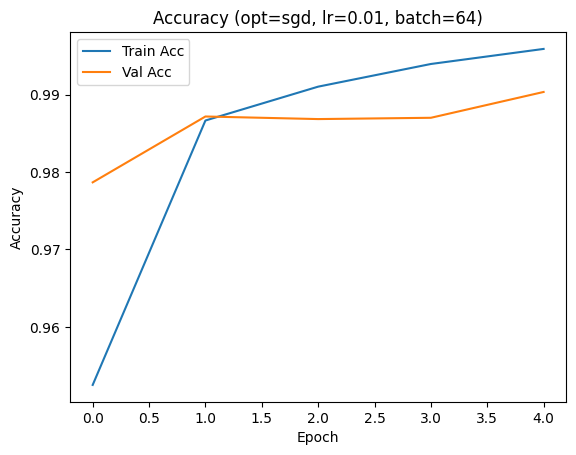

In [ ]:
#no dropout, SGD, ReLU, batch size 64
model = Model(activation_fn='relu', dropout_rate_1=0.0, dropout_rate_2=0.0)
acc = Compile_Train(model, optimizer_choice='sgd', learning_rate=0.01, momentum=0.9, batch_size=64, epochs=5)



Testing learning rate: 0.01
Epoch 1/5
844/844 - 7s - 9ms/step - accuracy: 0.9516 - loss: 0.1585 - val_accuracy: 0.9830 - val_loss: 0.0602
Epoch 2/5
844/844 - 5s - 6ms/step - accuracy: 0.9873 - loss: 0.0418 - val_accuracy: 0.9858 - val_loss: 0.0488
Epoch 3/5
844/844 - 5s - 5ms/step - accuracy: 0.9918 - loss: 0.0265 - val_accuracy: 0.9900 - val_loss: 0.0361
Epoch 4/5
844/844 - 5s - 6ms/step - accuracy: 0.9942 - loss: 0.0177 - val_accuracy: 0.9883 - val_loss: 0.0421
Epoch 5/5
844/844 - 5s - 6ms/step - accuracy: 0.9960 - loss: 0.0129 - val_accuracy: 0.9885 - val_loss: 0.0406
Test Accuracy: 0.9897


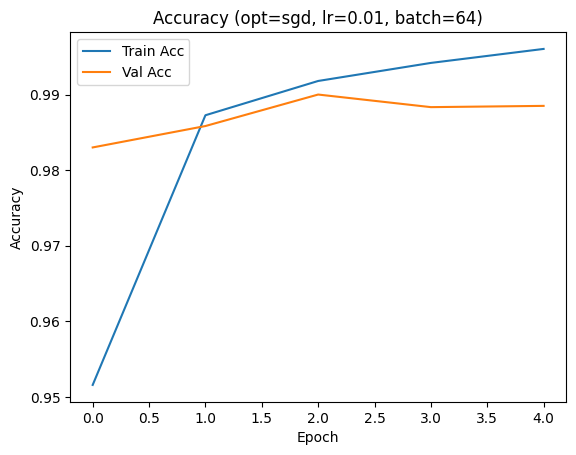


Testing learning rate: 0.001
Epoch 1/5
844/844 - 8s - 10ms/step - accuracy: 0.8794 - loss: 0.4098 - val_accuracy: 0.9580 - val_loss: 0.1488
Epoch 2/5
844/844 - 8s - 9ms/step - accuracy: 0.9696 - loss: 0.1017 - val_accuracy: 0.9758 - val_loss: 0.0823
Epoch 3/5
844/844 - 5s - 6ms/step - accuracy: 0.9794 - loss: 0.0669 - val_accuracy: 0.9800 - val_loss: 0.0657
Epoch 4/5
844/844 - 5s - 5ms/step - accuracy: 0.9841 - loss: 0.0509 - val_accuracy: 0.9850 - val_loss: 0.0545
Epoch 5/5
844/844 - 5s - 6ms/step - accuracy: 0.9875 - loss: 0.0401 - val_accuracy: 0.9848 - val_loss: 0.0502
Test Accuracy: 0.9851


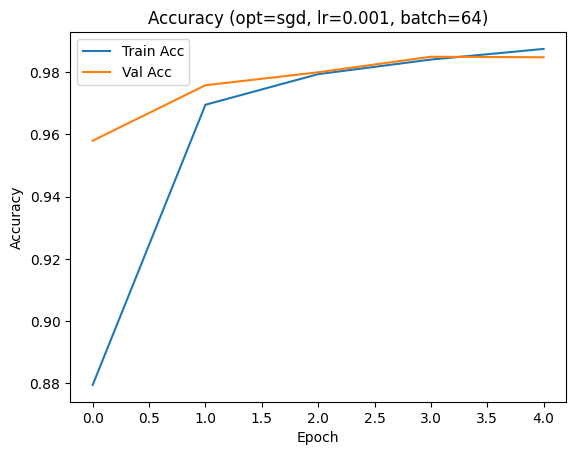


Testing learning rate: 0.0001
Epoch 1/5
844/844 - 8s - 9ms/step - accuracy: 0.6704 - loss: 1.2708 - val_accuracy: 0.8817 - val_loss: 0.4118
Epoch 2/5
844/844 - 5s - 6ms/step - accuracy: 0.9043 - loss: 0.3316 - val_accuracy: 0.9207 - val_loss: 0.2840
Epoch 3/5
844/844 - 4s - 5ms/step - accuracy: 0.9243 - loss: 0.2589 - val_accuracy: 0.9328 - val_loss: 0.2315
Epoch 4/5
844/844 - 5s - 6ms/step - accuracy: 0.9367 - loss: 0.2153 - val_accuracy: 0.9417 - val_loss: 0.1988
Epoch 5/5
844/844 - 5s - 6ms/step - accuracy: 0.9462 - loss: 0.1850 - val_accuracy: 0.9460 - val_loss: 0.1870
Test Accuracy: 0.9478


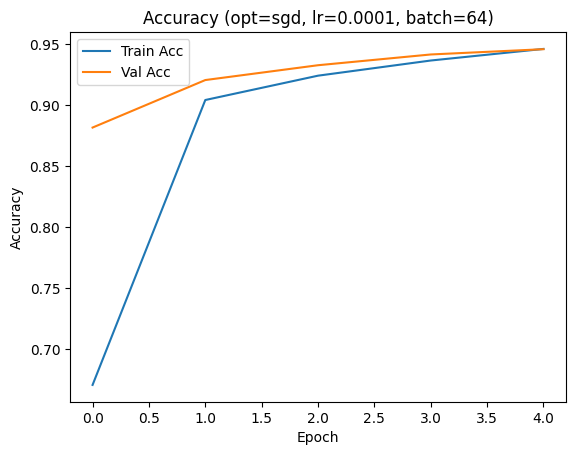

In [ ]:
#Different Learning Rate
#using 0.01 in Default Case
for lr in [0.01,0.001,0.0001]:
    print(f"\nTesting learning rate: {lr}")
    model =Model(activation_fn='relu', dropout_rate_1=0.0, dropout_rate_2=0.0)
    Compile_Train(model, optimizer_choice='sgd', learning_rate=lr, momentum=0.9, batch_size=64, epochs=5)



Testing batch size: 32
Epoch 1/5
1688/1688 - 11s - 6ms/step - accuracy: 0.9596 - loss: 0.1305 - val_accuracy: 0.9862 - val_loss: 0.0505
Epoch 2/5
1688/1688 - 7s - 4ms/step - accuracy: 0.9877 - loss: 0.0377 - val_accuracy: 0.9885 - val_loss: 0.0430
Epoch 3/5
1688/1688 - 10s - 6ms/step - accuracy: 0.9926 - loss: 0.0231 - val_accuracy: 0.9888 - val_loss: 0.0411
Epoch 4/5
1688/1688 - 7s - 4ms/step - accuracy: 0.9946 - loss: 0.0163 - val_accuracy: 0.9893 - val_loss: 0.0386
Epoch 5/5
1688/1688 - 11s - 6ms/step - accuracy: 0.9961 - loss: 0.0123 - val_accuracy: 0.9907 - val_loss: 0.0355
Test Accuracy: 0.9905


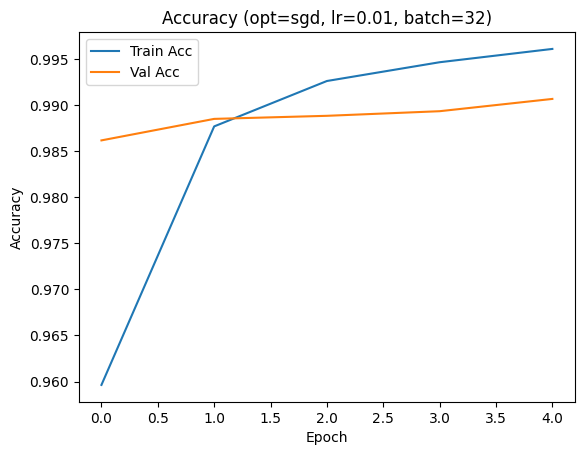


Testing batch size: 64
Epoch 1/5
844/844 - 8s - 9ms/step - accuracy: 0.9498 - loss: 0.1659 - val_accuracy: 0.9823 - val_loss: 0.0555
Epoch 2/5
844/844 - 5s - 5ms/step - accuracy: 0.9873 - loss: 0.0403 - val_accuracy: 0.9865 - val_loss: 0.0448
Epoch 3/5
844/844 - 5s - 6ms/step - accuracy: 0.9912 - loss: 0.0268 - val_accuracy: 0.9878 - val_loss: 0.0389
Epoch 4/5
844/844 - 5s - 5ms/step - accuracy: 0.9947 - loss: 0.0168 - val_accuracy: 0.9908 - val_loss: 0.0347
Epoch 5/5
844/844 - 5s - 6ms/step - accuracy: 0.9958 - loss: 0.0133 - val_accuracy: 0.9875 - val_loss: 0.0431
Test Accuracy: 0.9909


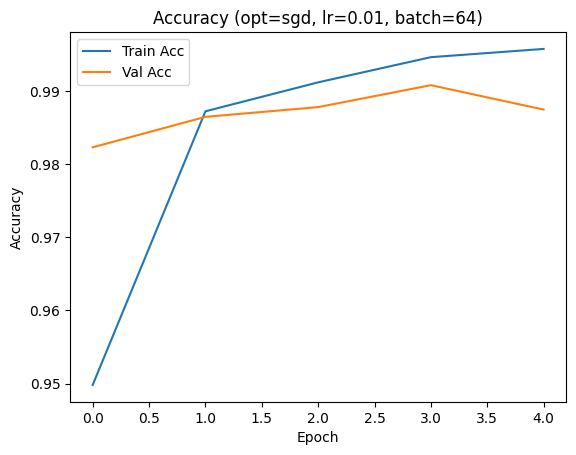


Testing batch size: 128
Epoch 1/5
422/422 - 11s - 26ms/step - accuracy: 0.9131 - loss: 0.3121 - val_accuracy: 0.9782 - val_loss: 0.0737
Epoch 2/5
422/422 - 4s - 9ms/step - accuracy: 0.9839 - loss: 0.0522 - val_accuracy: 0.9857 - val_loss: 0.0520
Epoch 3/5
422/422 - 5s - 12ms/step - accuracy: 0.9900 - loss: 0.0337 - val_accuracy: 0.9882 - val_loss: 0.0422
Epoch 4/5
422/422 - 4s - 9ms/step - accuracy: 0.9920 - loss: 0.0253 - val_accuracy: 0.9868 - val_loss: 0.0461
Epoch 5/5
422/422 - 5s - 12ms/step - accuracy: 0.9935 - loss: 0.0198 - val_accuracy: 0.9842 - val_loss: 0.0528
Test Accuracy: 0.9887


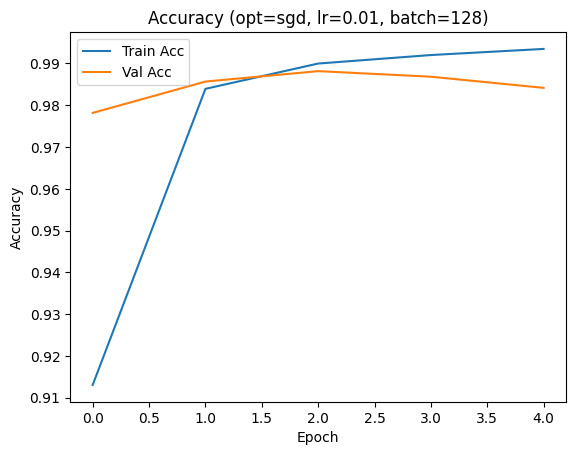

In [ ]:
#Different Batch Size
#using 64 in Default Case
for bs in [32, 64, 128]:
    print(f"\nTesting batch size: {bs}")
    model = Model(activation_fn='relu', dropout_rate_1=0.0, dropout_rate_2=0.0)
    Compile_Train(model, optimizer_choice='sgd', learning_rate=0.01, momentum=0.9, batch_size=bs, epochs=5)


Testing activation function: relu
Epoch 1/5
844/844 - 9s - 11ms/step - accuracy: 0.9444 - loss: 0.1872 - val_accuracy: 0.9790 - val_loss: 0.0705
Epoch 2/5
844/844 - 8s - 9ms/step - accuracy: 0.9859 - loss: 0.0446 - val_accuracy: 0.9855 - val_loss: 0.0473
Epoch 3/5
844/844 - 5s - 6ms/step - accuracy: 0.9914 - loss: 0.0273 - val_accuracy: 0.9838 - val_loss: 0.0516
Epoch 4/5
844/844 - 6s - 7ms/step - accuracy: 0.9940 - loss: 0.0191 - val_accuracy: 0.9857 - val_loss: 0.0492
Epoch 5/5
844/844 - 5s - 6ms/step - accuracy: 0.9952 - loss: 0.0140 - val_accuracy: 0.9867 - val_loss: 0.0475
Test Accuracy: 0.9904


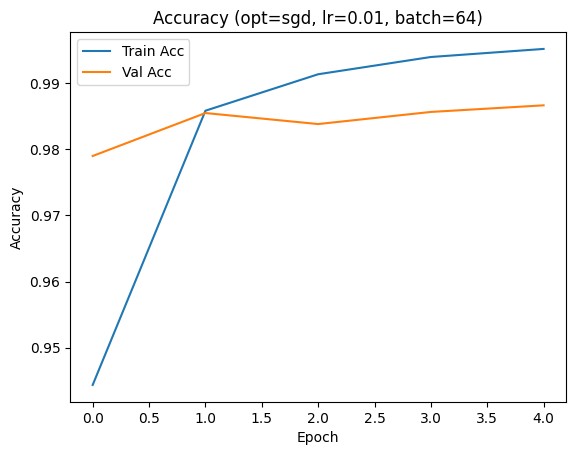


Testing activation function: tanh
Epoch 1/5
844/844 - 9s - 11ms/step - accuracy: 0.9541 - loss: 0.1546 - val_accuracy: 0.9805 - val_loss: 0.0651
Epoch 2/5
844/844 - 8s - 10ms/step - accuracy: 0.9864 - loss: 0.0469 - val_accuracy: 0.9867 - val_loss: 0.0458
Epoch 3/5
844/844 - 5s - 6ms/step - accuracy: 0.9918 - loss: 0.0287 - val_accuracy: 0.9867 - val_loss: 0.0425
Epoch 4/5
844/844 - 5s - 6ms/step - accuracy: 0.9951 - loss: 0.0187 - val_accuracy: 0.9895 - val_loss: 0.0370
Epoch 5/5
844/844 - 5s - 6ms/step - accuracy: 0.9968 - loss: 0.0126 - val_accuracy: 0.9900 - val_loss: 0.0347
Test Accuracy: 0.9906


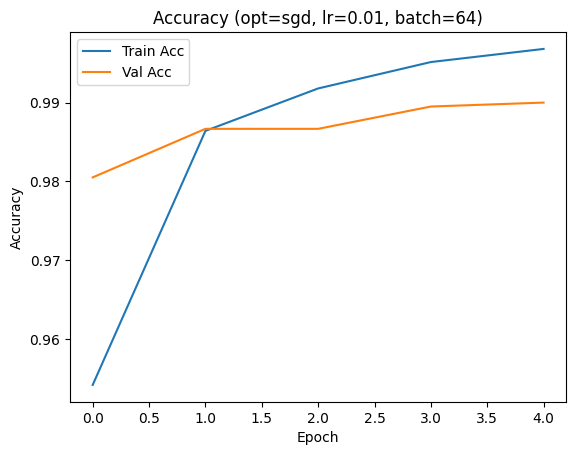


Testing activation function: elu
Epoch 1/5
844/844 - 8s - 10ms/step - accuracy: 0.9591 - loss: 0.1332 - val_accuracy: 0.9862 - val_loss: 0.0459
Epoch 2/5
844/844 - 5s - 5ms/step - accuracy: 0.9886 - loss: 0.0372 - val_accuracy: 0.9900 - val_loss: 0.0407
Epoch 3/5
844/844 - 5s - 6ms/step - accuracy: 0.9929 - loss: 0.0226 - val_accuracy: 0.9908 - val_loss: 0.0358
Epoch 4/5
844/844 - 5s - 6ms/step - accuracy: 0.9951 - loss: 0.0150 - val_accuracy: 0.9908 - val_loss: 0.0364
Epoch 5/5
844/844 - 5s - 6ms/step - accuracy: 0.9966 - loss: 0.0100 - val_accuracy: 0.9910 - val_loss: 0.0361
Test Accuracy: 0.9914


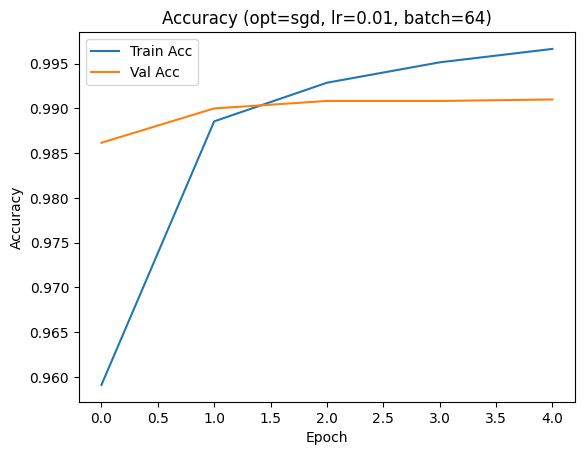


Testing activation function: sigmoid
Epoch 1/5
844/844 - 8s - 10ms/step - accuracy: 0.1014 - loss: 2.3195 - val_accuracy: 0.1107 - val_loss: 2.3167
Epoch 2/5
844/844 - 7s - 9ms/step - accuracy: 0.1074 - loss: 2.3131 - val_accuracy: 0.1107 - val_loss: 2.3004
Epoch 3/5
844/844 - 5s - 6ms/step - accuracy: 0.6308 - loss: 1.1036 - val_accuracy: 0.9000 - val_loss: 0.3543
Epoch 4/5
844/844 - 5s - 6ms/step - accuracy: 0.9142 - loss: 0.2858 - val_accuracy: 0.9310 - val_loss: 0.2371
Epoch 5/5
844/844 - 5s - 5ms/step - accuracy: 0.9385 - loss: 0.2052 - val_accuracy: 0.9508 - val_loss: 0.1772
Test Accuracy: 0.9527


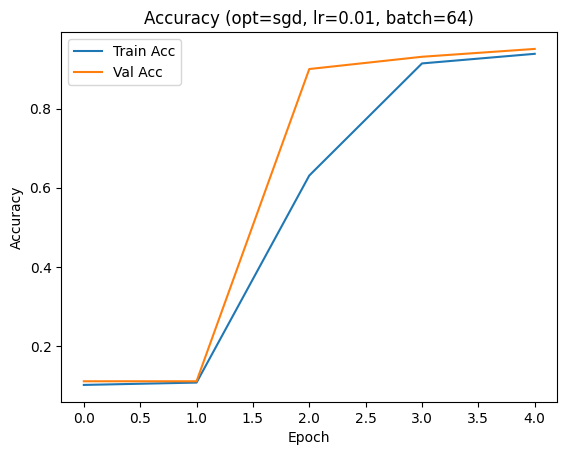

In [ ]:
#Different Activation Function
for act in ['relu', 'tanh', 'elu', 'sigmoid']:
    print(f"\nTesting activation function: {act}")
    model = Model(activation_fn=act, dropout_rate_1=0.0, dropout_rate_2=0.0)
    Compile_Train(model, optimizer_choice='sgd', learning_rate=0.01, momentum=0.9, batch_size=64, epochs=5)



Testing optimizer: adam
Epoch 1/5
844/844 - 9s - 11ms/step - accuracy: 0.9256 - loss: 0.2940 - val_accuracy: 0.9527 - val_loss: 0.1551
Epoch 2/5
844/844 - 5s - 6ms/step - accuracy: 0.9705 - loss: 0.0983 - val_accuracy: 0.9732 - val_loss: 0.0912
Epoch 3/5
844/844 - 5s - 6ms/step - accuracy: 0.9755 - loss: 0.0811 - val_accuracy: 0.9777 - val_loss: 0.0840
Epoch 4/5
844/844 - 5s - 6ms/step - accuracy: 0.9762 - loss: 0.0772 - val_accuracy: 0.9738 - val_loss: 0.0926
Epoch 5/5
844/844 - 5s - 6ms/step - accuracy: 0.9772 - loss: 0.0749 - val_accuracy: 0.9652 - val_loss: 0.1429
Test Accuracy: 0.9706


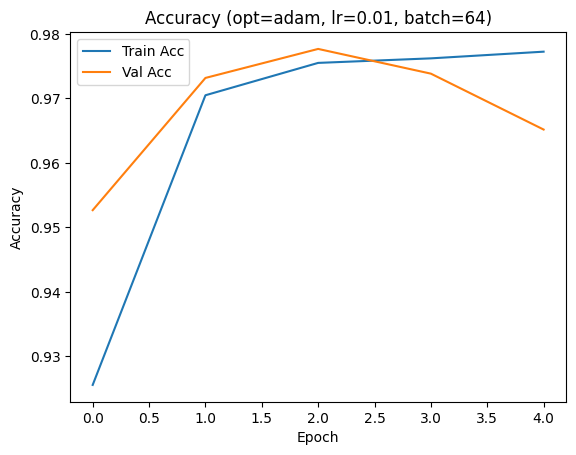


Testing optimizer: rmsprop
Epoch 1/5
844/844 - 8s - 9ms/step - accuracy: 0.1104 - loss: 3.0440 - val_accuracy: 0.1107 - val_loss: 2.3028
Epoch 2/5
844/844 - 5s - 5ms/step - accuracy: 0.1107 - loss: 2.3021 - val_accuracy: 0.1107 - val_loss: 2.3022
Epoch 3/5
844/844 - 5s - 5ms/step - accuracy: 0.1115 - loss: 2.3021 - val_accuracy: 0.1107 - val_loss: 2.3026
Epoch 4/5
844/844 - 5s - 6ms/step - accuracy: 0.1101 - loss: 2.3020 - val_accuracy: 0.1017 - val_loss: 2.3034
Epoch 5/5
844/844 - 4s - 5ms/step - accuracy: 0.1101 - loss: 2.3020 - val_accuracy: 0.1107 - val_loss: 2.3039
Test Accuracy: 0.1135


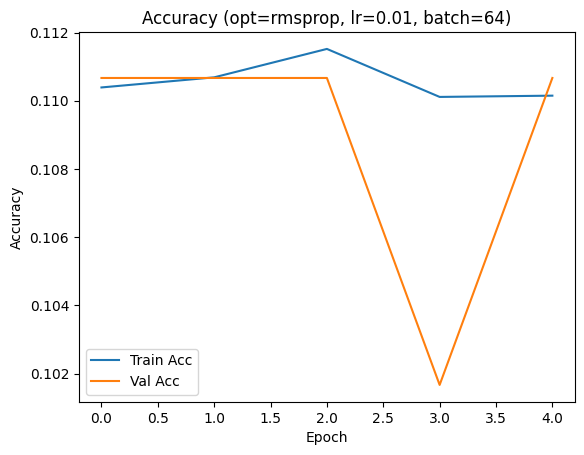


Testing optimizer: sgd
Epoch 1/5
844/844 - 7s - 9ms/step - accuracy: 0.9519 - loss: 0.1551 - val_accuracy: 0.9815 - val_loss: 0.0600
Epoch 2/5
844/844 - 9s - 10ms/step - accuracy: 0.9864 - loss: 0.0434 - val_accuracy: 0.9872 - val_loss: 0.0460
Epoch 3/5
844/844 - 5s - 5ms/step - accuracy: 0.9915 - loss: 0.0272 - val_accuracy: 0.9903 - val_loss: 0.0378
Epoch 4/5
844/844 - 5s - 5ms/step - accuracy: 0.9940 - loss: 0.0190 - val_accuracy: 0.9883 - val_loss: 0.0462
Epoch 5/5
844/844 - 5s - 6ms/step - accuracy: 0.9950 - loss: 0.0149 - val_accuracy: 0.9905 - val_loss: 0.0389
Test Accuracy: 0.9922


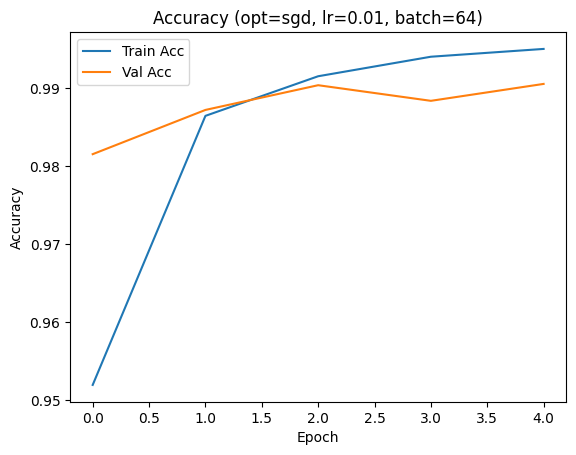

In [ ]:
#uisng Different Optimizer
for opt in ['adam', 'rmsprop','sgd']:
    print(f"\nTesting optimizer: {opt}")
    model = Model(activation_fn='relu', dropout_rate_1=0.0, dropout_rate_2=0.0)
    Compile_Train(model, optimizer_choice=opt, learning_rate=0.01, batch_size=64, epochs=5)



Testing dropout rates: dropout1=0.2, dropout2=0.2
Epoch 1/5
844/844 - 10s - 11ms/step - accuracy: 0.9434 - loss: 0.1806 - val_accuracy: 0.9833 - val_loss: 0.0537
Epoch 2/5
844/844 - 5s - 6ms/step - accuracy: 0.9834 - loss: 0.0544 - val_accuracy: 0.9872 - val_loss: 0.0437
Epoch 3/5
844/844 - 5s - 5ms/step - accuracy: 0.9884 - loss: 0.0386 - val_accuracy: 0.9882 - val_loss: 0.0356
Epoch 4/5
844/844 - 5s - 6ms/step - accuracy: 0.9911 - loss: 0.0294 - val_accuracy: 0.9908 - val_loss: 0.0296
Epoch 5/5
844/844 - 5s - 6ms/step - accuracy: 0.9925 - loss: 0.0230 - val_accuracy: 0.9903 - val_loss: 0.0404
Test Accuracy: 0.9900


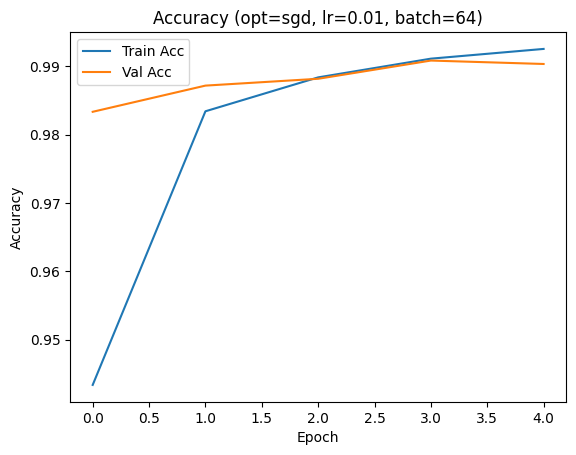


Testing dropout rates: dropout1=0.2, dropout2=0.5
Epoch 1/5
844/844 - 11s - 13ms/step - accuracy: 0.9193 - loss: 0.2579 - val_accuracy: 0.9790 - val_loss: 0.0684
Epoch 2/5
844/844 - 5s - 6ms/step - accuracy: 0.9751 - loss: 0.0830 - val_accuracy: 0.9858 - val_loss: 0.0461
Epoch 3/5
844/844 - 5s - 6ms/step - accuracy: 0.9820 - loss: 0.0611 - val_accuracy: 0.9908 - val_loss: 0.0368
Epoch 4/5
844/844 - 5s - 6ms/step - accuracy: 0.9849 - loss: 0.0502 - val_accuracy: 0.9905 - val_loss: 0.0369
Epoch 5/5
844/844 - 5s - 6ms/step - accuracy: 0.9874 - loss: 0.0413 - val_accuracy: 0.9908 - val_loss: 0.0352
Test Accuracy: 0.9918


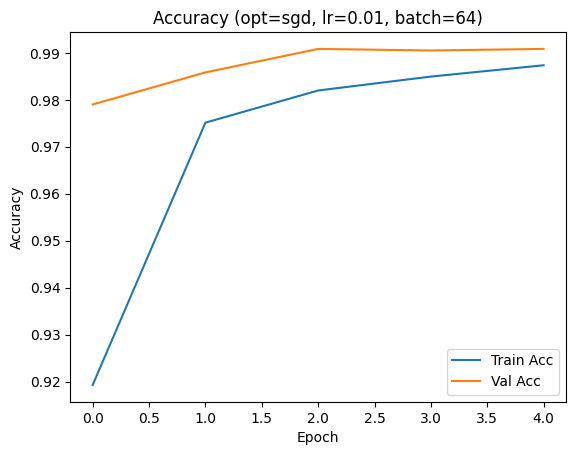


Testing dropout rates: dropout1=0.5, dropout2=0.2
Epoch 1/5
844/844 - 10s - 12ms/step - accuracy: 0.9324 - loss: 0.2147 - val_accuracy: 0.9813 - val_loss: 0.0654
Epoch 2/5
844/844 - 5s - 6ms/step - accuracy: 0.9795 - loss: 0.0655 - val_accuracy: 0.9862 - val_loss: 0.0453
Epoch 3/5
844/844 - 5s - 6ms/step - accuracy: 0.9853 - loss: 0.0467 - val_accuracy: 0.9875 - val_loss: 0.0439
Epoch 4/5
844/844 - 5s - 5ms/step - accuracy: 0.9876 - loss: 0.0385 - val_accuracy: 0.9887 - val_loss: 0.0425
Epoch 5/5
844/844 - 5s - 6ms/step - accuracy: 0.9897 - loss: 0.0331 - val_accuracy: 0.9908 - val_loss: 0.0318
Test Accuracy: 0.9915


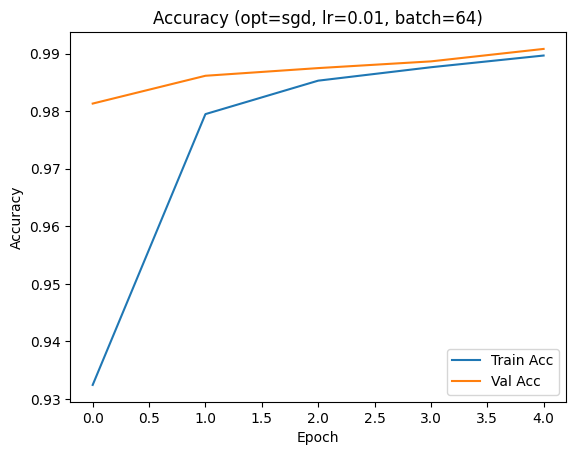


Testing dropout rates: dropout1=0.5, dropout2=0.5
Epoch 1/5
844/844 - 11s - 13ms/step - accuracy: 0.9081 - loss: 0.2879 - val_accuracy: 0.9810 - val_loss: 0.0613
Epoch 2/5
844/844 - 5s - 6ms/step - accuracy: 0.9706 - loss: 0.1005 - val_accuracy: 0.9888 - val_loss: 0.0425
Epoch 3/5
844/844 - 5s - 6ms/step - accuracy: 0.9780 - loss: 0.0761 - val_accuracy: 0.9898 - val_loss: 0.0397
Epoch 4/5
844/844 - 5s - 6ms/step - accuracy: 0.9815 - loss: 0.0610 - val_accuracy: 0.9910 - val_loss: 0.0350
Epoch 5/5
844/844 - 5s - 6ms/step - accuracy: 0.9832 - loss: 0.0536 - val_accuracy: 0.9913 - val_loss: 0.0313
Test Accuracy: 0.9919


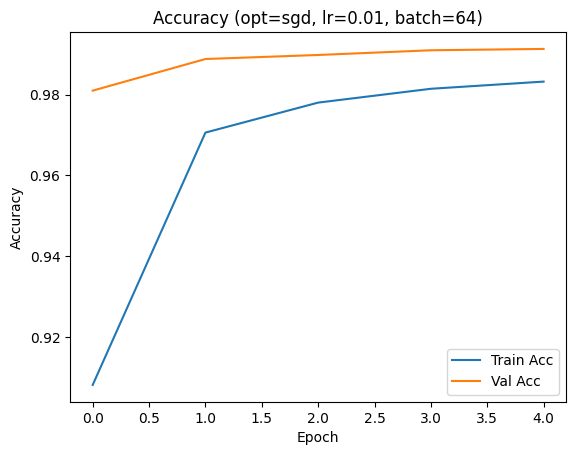

In [ ]:
#using Different dropout
for dr1 in [0.2, 0.5]:
    for dr2 in [0.2, 0.5]:
        print(f"\nTesting dropout rates: dropout1={dr1}, dropout2={dr2}")
        model = Model(activation_fn='relu', dropout_rate_1=dr1, dropout_rate_2=dr2)
        Compile_Train(model, optimizer_choice='sgd', learning_rate=0.01, batch_size=64, epochs=5)


In [ ]:
# Try 1, 2, or 3 CNN layers and different FC sizes

In [ ]:
def Model_Variant(conv_layers=2, dense_units=128, activation_fn='relu', dropout_rate_1=0.0, dropout_rate_2=0.0):
    model = models.Sequential()
    model.add(layers.Conv2D(32, (3, 3), activation=activation_fn, padding='valid', input_shape=(28, 28, 1)))

    if conv_layers >= 2:
        model.add(layers.Conv2D(64, (5, 5), activation=activation_fn, padding='same'))
        model.add(layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

    if conv_layers >= 3:
        if dropout_rate_1 > 0:
            model.add(layers.Dropout(dropout_rate_1))
        model.add(layers.Conv2D(64, (3, 3), activation=activation_fn, padding='same'))

    model.add(layers.Flatten())
    model.add(layers.Dense(dense_units, activation=activation_fn))

    if dropout_rate_2 > 0:
        model.add(layers.Dropout(dropout_rate_2))

    model.add(layers.Dense(10, activation='softmax'))
    return model


Testing CNN layers: 1, FC units: 64
Epoch 1/5
1688/1688 - 7s - 4ms/step - accuracy: 0.9476 - loss: 0.1743 - val_accuracy: 0.9717 - val_loss: 0.0962
Epoch 2/5
1688/1688 - 9s - 5ms/step - accuracy: 0.9816 - loss: 0.0591 - val_accuracy: 0.9838 - val_loss: 0.0622
Epoch 3/5
1688/1688 - 5s - 3ms/step - accuracy: 0.9896 - loss: 0.0324 - val_accuracy: 0.9798 - val_loss: 0.0738
Epoch 4/5
1688/1688 - 5s - 3ms/step - accuracy: 0.9933 - loss: 0.0196 - val_accuracy: 0.9797 - val_loss: 0.0780
Epoch 5/5
1688/1688 - 5s - 3ms/step - accuracy: 0.9961 - loss: 0.0120 - val_accuracy: 0.9825 - val_loss: 0.0723
Test Accuracy: 0.9845


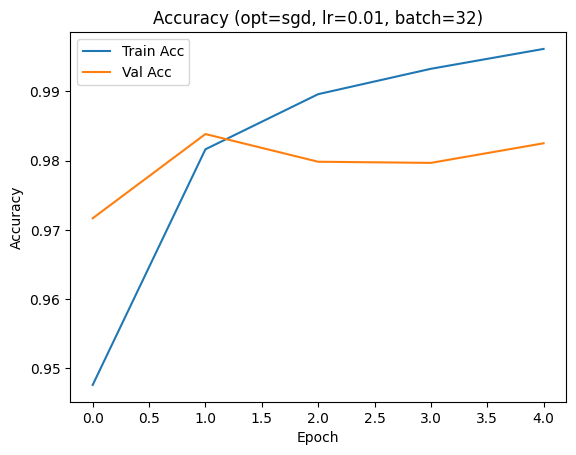


Testing CNN layers: 1, FC units: 128
Epoch 1/5
1688/1688 - 8s - 5ms/step - accuracy: 0.9513 - loss: 0.1597 - val_accuracy: 0.9755 - val_loss: 0.0784
Epoch 2/5
1688/1688 - 8s - 5ms/step - accuracy: 0.9850 - loss: 0.0481 - val_accuracy: 0.9790 - val_loss: 0.0646
Epoch 3/5
1688/1688 - 5s - 3ms/step - accuracy: 0.9921 - loss: 0.0252 - val_accuracy: 0.9813 - val_loss: 0.0700
Epoch 4/5
1688/1688 - 5s - 3ms/step - accuracy: 0.9953 - loss: 0.0142 - val_accuracy: 0.9828 - val_loss: 0.0652
Epoch 5/5
1688/1688 - 5s - 3ms/step - accuracy: 0.9977 - loss: 0.0072 - val_accuracy: 0.9843 - val_loss: 0.0665
Test Accuracy: 0.9858


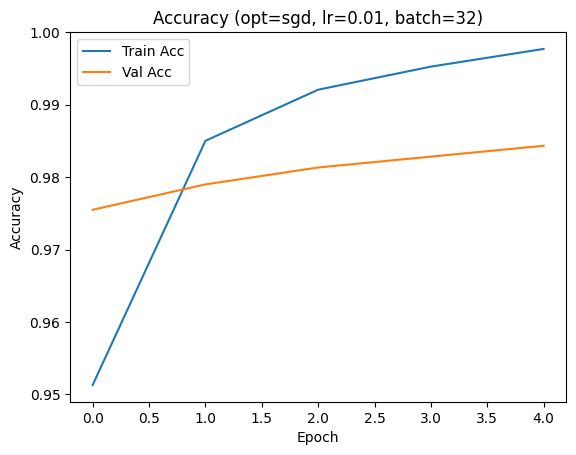


Testing CNN layers: 2, FC units: 64
Epoch 1/5
1688/1688 - 9s - 6ms/step - accuracy: 0.9602 - loss: 0.1281 - val_accuracy: 0.9800 - val_loss: 0.0675
Epoch 2/5
1688/1688 - 6s - 4ms/step - accuracy: 0.9873 - loss: 0.0410 - val_accuracy: 0.9828 - val_loss: 0.0540
Epoch 3/5
1688/1688 - 6s - 3ms/step - accuracy: 0.9918 - loss: 0.0260 - val_accuracy: 0.9867 - val_loss: 0.0493
Epoch 4/5
1688/1688 - 11s - 6ms/step - accuracy: 0.9945 - loss: 0.0166 - val_accuracy: 0.9877 - val_loss: 0.0399
Epoch 5/5
1688/1688 - 6s - 4ms/step - accuracy: 0.9957 - loss: 0.0129 - val_accuracy: 0.9892 - val_loss: 0.0441
Test Accuracy: 0.9895


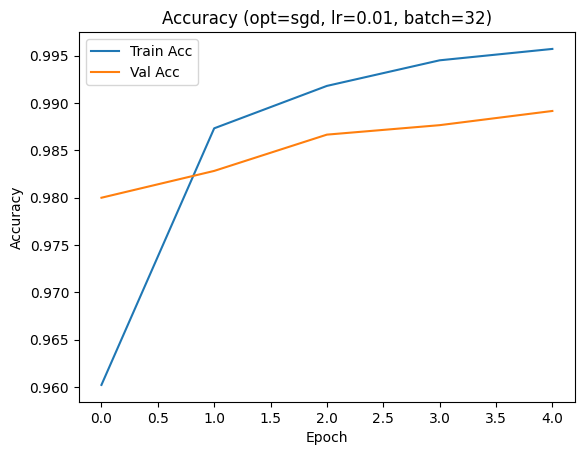


Testing CNN layers: 2, FC units: 128
Epoch 1/5
1688/1688 - 9s - 5ms/step - accuracy: 0.9611 - loss: 0.1273 - val_accuracy: 0.9850 - val_loss: 0.0474
Epoch 2/5
1688/1688 - 7s - 4ms/step - accuracy: 0.9879 - loss: 0.0391 - val_accuracy: 0.9852 - val_loss: 0.0469
Epoch 3/5
1688/1688 - 10s - 6ms/step - accuracy: 0.9925 - loss: 0.0234 - val_accuracy: 0.9908 - val_loss: 0.0341
Epoch 4/5
1688/1688 - 10s - 6ms/step - accuracy: 0.9953 - loss: 0.0154 - val_accuracy: 0.9873 - val_loss: 0.0470
Epoch 5/5
1688/1688 - 10s - 6ms/step - accuracy: 0.9964 - loss: 0.0108 - val_accuracy: 0.9880 - val_loss: 0.0462
Test Accuracy: 0.9884


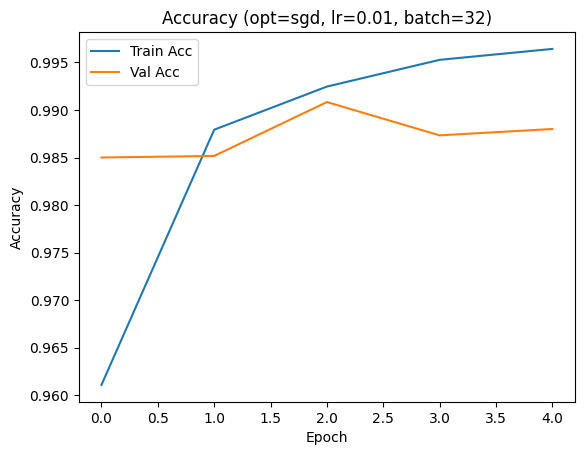


Testing CNN layers: 3, FC units: 64
Epoch 1/5
1688/1688 - 10s - 6ms/step - accuracy: 0.9592 - loss: 0.1312 - val_accuracy: 0.9817 - val_loss: 0.0569
Epoch 2/5
1688/1688 - 8s - 4ms/step - accuracy: 0.9869 - loss: 0.0406 - val_accuracy: 0.9855 - val_loss: 0.0473
Epoch 3/5
1688/1688 - 7s - 4ms/step - accuracy: 0.9917 - loss: 0.0263 - val_accuracy: 0.9875 - val_loss: 0.0495
Epoch 4/5
1688/1688 - 10s - 6ms/step - accuracy: 0.9936 - loss: 0.0201 - val_accuracy: 0.9898 - val_loss: 0.0433
Epoch 5/5
1688/1688 - 6s - 4ms/step - accuracy: 0.9954 - loss: 0.0137 - val_accuracy: 0.9897 - val_loss: 0.0394
Test Accuracy: 0.9899


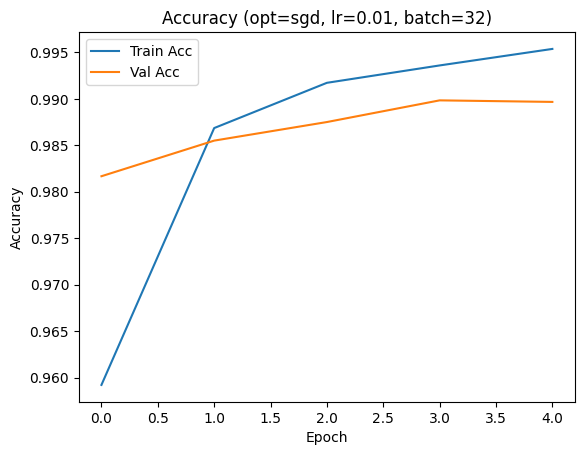


Testing CNN layers: 3, FC units: 128
Epoch 1/5
1688/1688 - 10s - 6ms/step - accuracy: 0.9602 - loss: 0.1253 - val_accuracy: 0.9847 - val_loss: 0.0521
Epoch 2/5
1688/1688 - 7s - 4ms/step - accuracy: 0.9881 - loss: 0.0379 - val_accuracy: 0.9893 - val_loss: 0.0409
Epoch 3/5
1688/1688 - 10s - 6ms/step - accuracy: 0.9925 - loss: 0.0230 - val_accuracy: 0.9875 - val_loss: 0.0444
Epoch 4/5
1688/1688 - 10s - 6ms/step - accuracy: 0.9941 - loss: 0.0170 - val_accuracy: 0.9895 - val_loss: 0.0381
Epoch 5/5
1688/1688 - 10s - 6ms/step - accuracy: 0.9963 - loss: 0.0108 - val_accuracy: 0.9868 - val_loss: 0.0554
Test Accuracy: 0.9895


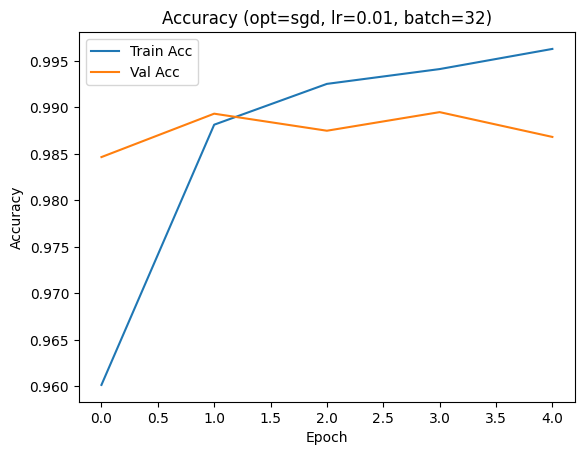

In [ ]:
for convs in [1, 2, 3]:
    for fc_units in [64, 128]:
        print(f"\nTesting CNN layers: {convs}, FC units: {fc_units}")
        model = Model_Variant(conv_layers=convs, dense_units=fc_units)
        Compile_Train(model, batch_size=32, epochs=5)